# Detector de placas paralelas
Queremos calcular a eficiência de um detector de placas paralelas. Sortearemos um ponto no detector maior de cima e uma direção no espaço ($\theta$ e $\phi$).

Dimensões das placas:
- Placa maior: 5m x 4m;
- Placa menor: 3m x 1m;
- Distância entre as placas: 2m.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import os
import pandas as pd

Lmaior = 3
Cmaior = 2
Lmenor = 2
Cmenor = 1
z0 = 0.5
N = 10000
z = [z0]*N

#### Largura
Calcula-se a posição $x$ pela fórmula:
$$x^* = L_{maior}\left(u^*-\frac{1}{2}\right),$$
em que $u^*$ é uma variável uniformemente distribuida.

In [4]:
#np.random.seed(1998)
u1 = np.random.random_sample(N)
#np.random.seed()
x = Lmaior*(u1 - 1/2)
#print(x.round(2))

#### Comprimento
Calcula-se a posição $y$ pela fórmula:
$$y^* = C_{maior}\left(u^*-\frac{1}{2}\right),$$
em que $u^*$ é uma variável uniformemente distribuida.

In [5]:
#np.random.seed(642)
u2 = np.random.random_sample(N)
#np.random.seed()
y = Cmaior*(u2 - 1/2)
#print(y.round(2))

#### Theta
Calcula-se o ângulo $\theta$ pela fórmula (intervalo $[0,\pi/2]$):
$$\theta^* = arccos(1-u^*),$$
em que $u^*$ é uma variável uniformemente distribuida.

In [6]:
#np.random.seed(108)
u3 = np.random.random_sample(N)
#np.random.seed()
theta = np.arccos(1. - u3)
theta_grau = np.degrees(np.arccos(1. - u3))
#print(theta.round(2))

#### Phi
Calcula-se o ângulo $\phi$ pela fórmula:
$$\phi^* = 2\pi u^*,$$
em que $u^*$ é uma variável uniformemente distribuida.

In [7]:
#np.random.seed(19230)
u4 = np.random.random_sample(N)
#np.random.seed()
phi = (2.*np.pi) * u4
phi_grau = np.degrees(phi)
#print(phi.round(2))

In [8]:
x_b = x + z*np.tan(theta)*np.cos(phi)
y_b = y + z*np.tan(theta)*np.sin(phi)
z_b = [0]*N

#print(x_b[0])
#print(y_b[0])

In [9]:
xb_in = []
yb_in = []
zb_in = []
count = 0
for i in range(N):
    if (y_b[i] > -Cmenor/2) and (y_b[i] < Cmenor/2):
        if (x_b[i] > -Lmenor/2) and (x_b[i] < Lmenor/2):
            xb_in.append(x_b[i])
            yb_in.append(y_b[i])
            zb_in.append(z_b[i])
            count+=1

In [10]:
eficiencia = (count)/N
print(round(eficiencia*100,2),'%')

19.93 %


(-1.0, 1.0)

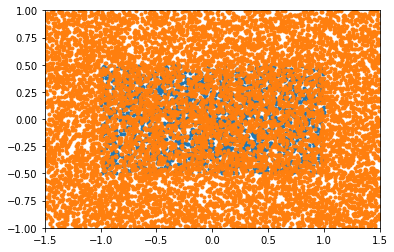

In [11]:
plt.plot(xb_in, yb_in, '.')
plt.plot(x, y, '.')
plt.xlim(-Lmaior/2, Lmaior/2)
plt.ylim(-Cmaior/2, Cmaior/2)

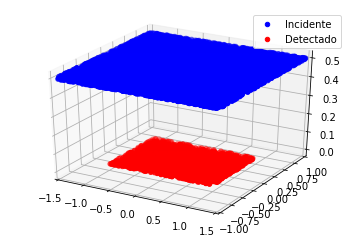

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x, y, z, color = 'b', label = 'Incidente')
ax.scatter(xb_in, yb_in, zb_in, color = 'r', label = 'Detectado')
ax.set_xlim3d(-Lmaior/2, Lmaior/2)
ax.set_ylim3d(-Cmaior/2, Cmaior/2)
ax.legend(loc = 'best')

name = 'particulas_detectadas'
ext = 'png'
path = os.path.join(name + '.' + ext)
fig.savefig(path, format='png')

### Eficiência em função da distância

In [13]:
passo = 0.01
limite = 10

eficiencia = []
z = np.arange(0,limite+passo, passo)
for j in range(len(z)):
    x_b = x + z[j]*np.tan(theta)*np.cos(phi)
    y_b = y + z[j]*np.tan(theta)*np.sin(phi)
    z_b = [0]*N
    count = 0
    for i in range(N):
        if (y_b[i] > -Cmenor/2) and (y_b[i] < Cmenor/2):
            if (x_b[i] > -Lmenor/2) and (x_b[i] < Lmenor/2):
                xb_in.append(x_b[i])
                yb_in.append(y_b[i])
                zb_in.append(z_b[i])
                count+=1
    eficiencia.append(count*100/N)

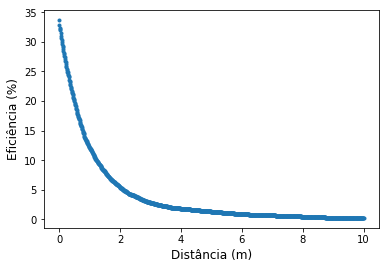

In [14]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.plot(z, eficiencia, '.')
plt.xlabel('Distância (m)', fontsize = '12')
plt.ylabel('Eficiência (%)', fontsize = '12')

name = 'eficiencia_distancia'
ext = 'png'
path = os.path.join(name + '.' + ext)
fig2.savefig(path, format='png')

## Histograma da eficiência

In [18]:
def calcula_eficiencia(Cmaior=3, Lmaior=2, Cmenor=2, Lmenor=1, z0=0.5, N=1000):
    u1 = np.random.random_sample(N)
    u2 = np.random.random_sample(N)
    u3 = np.random.random_sample(N)
    u4 = np.random.random_sample(N)
    x = Lmaior*(u1 - 1/2)
    y = Cmaior*(u2 - 1/2)
    z = [z0]*N
    theta = np.arccos(1. - u3)
    phi = (2.*np.pi) * u4
    x_b = x + z*np.tan(theta)*np.cos(phi)
    y_b = y + z*np.tan(theta)*np.sin(phi)
    z_b = [0]*N
    xb_in = []
    yb_in = []
    zb_in = []
    count = 0
    for i in range(N):
        if (y_b[i] > -Cmenor/2) and (y_b[i] < Cmenor/2):
            if (x_b[i] > -Lmenor/2) and (x_b[i] < Lmenor/2):
                xb_in.append(x_b[i])
                yb_in.append(y_b[i])
                zb_in.append(z_b[i])
                count+=1
    eficiencia = count/N*100
    return eficiencia

In [29]:
eficiencias = []
for k in range(1000):
    eficiencias.append(calcula_eficiencia(Cmaior=3, Lmaior=2, Cmenor=1, Lmenor=2, z0=0.5, N=1000))

print(np.mean(eficiencias))
print(np.std(eficiencias))

18.637
1.2170501222217598


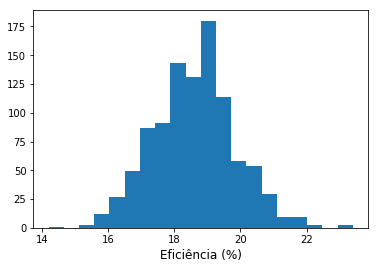

In [27]:
div = 20
plt.hist(eficiencias, bins = div)
plt.xlabel('Eficiência (%)', fontsize = 12)
plt.savefig('histograma_eficiencia.png', format='png')
plt.show()